<a href="https://colab.research.google.com/github/microprediction/microblog/blob/main/ou_paper_poll_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/jwergieluk/ou_noise.git

In [ ]:
!pip install --upgrade matplotlib

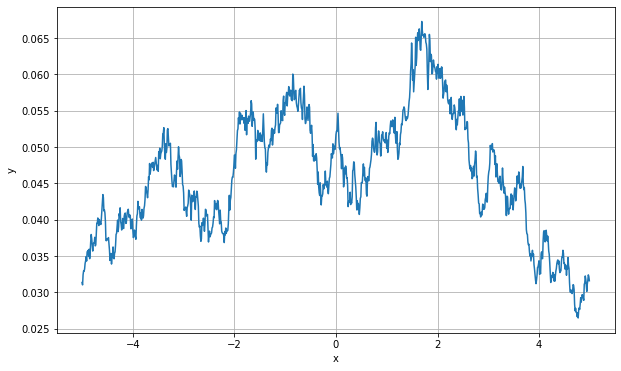

In [ ]:
from ou_noise import ou
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(10, 6))

F = 5

all_uncon=list()
for _ in range(1):
  t = np.arange(-50, 5, 0.01)
  x = ou.path(-0.1, t, 0.02, 0.0, 0.05)  
  y = np.exp(x*F)
  all_uncon.append(t[-1000:])
  all_uncon.append(y[-1000:])
plt.plot(*all_uncon);     
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()                                

# Brute force Brownian Bridge
(2 samples)

1.2840254166877414


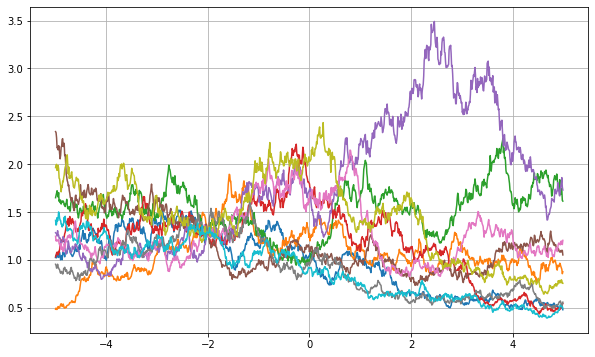

In [ ]:
b = 0.05
t0 = -1
t1 = 1 
rc('figure', figsize=(10, 6))
import math
t_right = numpy.arange(-2, 5, 0.01)
t_left = numpy.arange(-5,-2,0.01)
all_paths = list()
F = 5
tol = 0.035
for _ in range(10):
   x_right = ou.path(b, t_right, 0.02, 0.0, 0.05)  
   x_left = ou.path( b, t_left, 0.02, 0.0, 0.05) 
   x = list(reversed(x_left)) + list(x_right)
   t = list(t_left) + list(t_right) 
   y1 = math.exp(0.08*F)
   y = np.exp(F*np.array(x))
   if True:
       all_paths.append(t)
       all_paths.append(y)
plt.plot(*all_paths);
plt.grid()
print(math.exp(b*F))
  




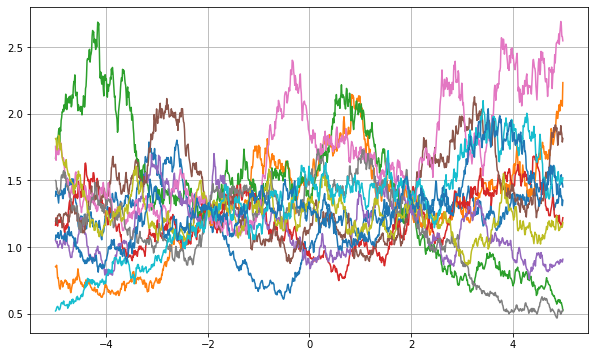

In [ ]:
tolr = 0.005
cond_paths = list()
d = 0.06 # really d/5
for _ in range(2000):
   x_right = ou.path(b, t_right, 0.02, 0.0, 0.05)  
   x_left = ou.path( b, t_left, 0.02, 0.0, 0.05) 
   x = list(reversed(x_left)) + list(x_right)
   t = list(t_left) + list(t_right) 
   y = np.exp(F*np.array(x))
   y2 = y[-300]
   y2hit = math.exp(F*d)
   if abs(y2-y2hit)<tolr:
       cond_paths.append(t)
       cond_paths.append(y)
plt.plot(*cond_paths);
plt.grid()